In [14]:
from pygmid import Lookup as lk
import numpy as np
import matplotlib.pyplot as plt

nmos = lk('../mat/nfet_01v8_lvt.mat')
pmos = lk('../mat/pfet_01v8_lvt.mat')

# Values in lookup table

In [15]:
print(f'VGS = ({min(nmos['VGS'])} V - {max(nmos['VGS'])} V), step = {np.diff(np.array(nmos['VGS']))[0]} V')
print(f'VDS = ({min(nmos['VDS'])} V - {max(nmos['VDS'])} V), step = {np.diff(np.array(nmos['VGS']))[0]} V')
print(f'VSB = ({min(nmos['VSB'])} V - {max(nmos['VSB'])} V), step = {np.diff(np.array(nmos['VSB']))[0]} V')
print(f'L = {nmos['L']}')

VGS = (0.0 V - 1.8 V), step = 0.025 V
VDS = (0.0 V - 1.8 V), step = 0.025 V
VSB = (-0.0 V - 0.4 V), step = 0.2 V
L = [0.15 0.16 0.17 0.18 0.19 0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.
 2.   3.  ]


# VGS plots

## gm/ID vs VGS

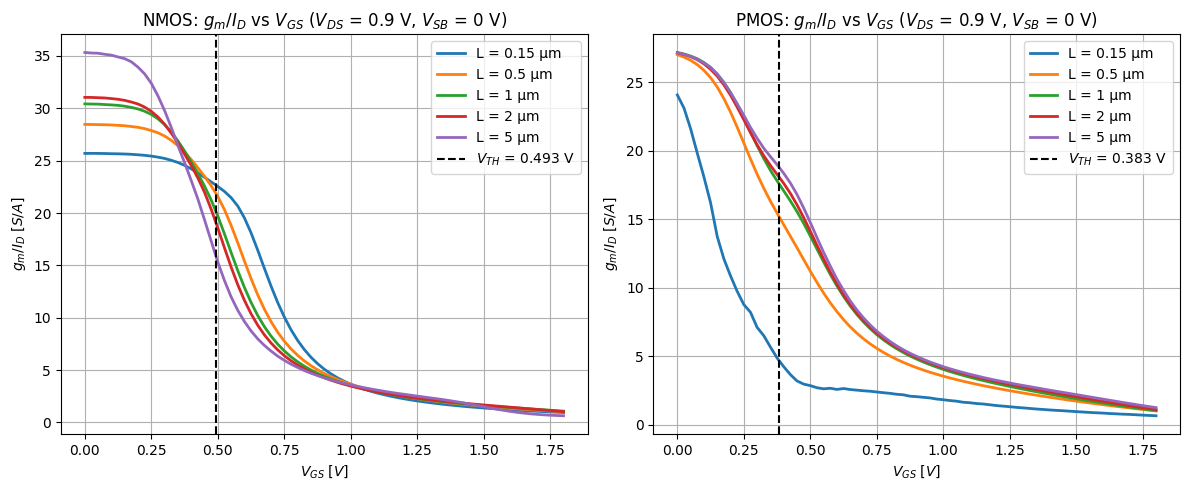

In [16]:
l = [0.15, 0.5, 1, 2, 5] # Change if needed
vgs = nmos['VGS']
vds = max(nmos['VDS']) / 2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# NMOS
vth_average = 0
index = 0
for length in l:
    x = nmos.lookup('GM_ID', VGS=vgs, VDS=vds, VSB=0, L=length)
    y = nmos.lookup('VT', VGS=max(nmos['VGS'])/2, VDS=vds, VSB=0, L=length)
    vth_average += y
    index += 1
    ax1.plot(vgs, x, label=f'L = {length} μm', linewidth=2)
vth_average = vth_average / index

ax1.axvline(x=vth_average, color='black', linestyle='--', linewidth=1.5, label=f'$V_{{TH}}$ = {vth_average:.3f} V')
ax1.set_xlabel('$V_{GS}$ $[V]$')
ax1.set_ylabel('$g_m/I_D$ $[S/A]$')
ax1.set_title(f'NMOS: $g_m/I_D$ vs $V_{{GS}}$ ($V_{{DS}}$ = {vds} V, $V_{{SB}}$ = 0 V)')
ax1.grid(True)
ax1.legend()

# PMOS
vth_average = 0
index = 0
for length in l:
    x = pmos.lookup('GM_ID', VGS=vgs, VDS=vds, VSB=0, L=length)
    y = pmos.lookup('VT', VGS=max(nmos['VGS'])/2, VDS=vds, VSB=0, L=length)
    vth_average += y
    index += 1
    ax2.plot(vgs, x, label=f'L = {length} μm', linewidth=2)
vth_average = vth_average / index

ax2.axvline(x=vth_average, color='black', linestyle='--', linewidth=1.5, label=f'$V_{{TH}}$ = {vth_average:.3f} V')
ax2.set_xlabel('$V_{GS}$ $[V]$')
ax2.set_ylabel('$g_m/I_D$ $[S/A]$')
ax2.set_title(f'PMOS: $g_m/I_D$ vs $V_{{GS}}$ ($V_{{DS}}$ = {vds} V, $V_{{SB}}$ = 0 V)')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

## JD vs VGS

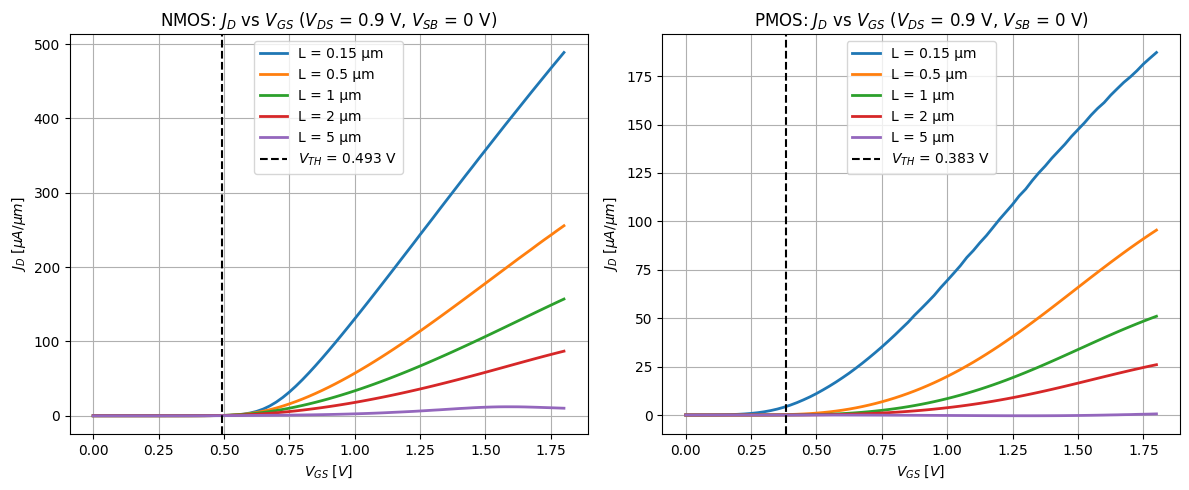

In [17]:
l = [0.15, 0.5, 1, 2, 5] # Change if needed
vgs = nmos['VGS']
vds = max(nmos['VDS']) / 2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# NMOS
vth_average = 0
index = 0
for length in l:
    x = nmos.lookup('ID_W', VGS=vgs, VDS=vds, VSB=0, L=length)
    y = nmos.lookup('VT', VGS=max(nmos['VGS'])/2, VDS=vds, VSB=0, L=length)
    vth_average += y
    index += 1
    ax1.plot(vgs, x/1e-6, label=f'L = {length} μm', linewidth=2)
vth_average = vth_average / index

ax1.axvline(x=vth_average, color='black', linestyle='--', linewidth=1.5, label=f'$V_{{TH}}$ = {vth_average:.3f} V')
ax1.set_xlabel('$V_{GS}$ $[V]$')
ax1.set_ylabel('$J_D$ $[μA/μm]$')
ax1.set_title(f'NMOS: $J_D$ vs $V_{{GS}}$ ($V_{{DS}}$ = {vds} V, $V_{{SB}}$ = 0 V)')
ax1.grid(True)
ax1.legend()

# PMOS
vth_average = 0
index = 0
for length in l:
    x = pmos.lookup('ID_W', VGS=vgs, VDS=vds, VSB=0, L=length)
    y = pmos.lookup('VT', VGS=max(nmos['VGS'])/2, VDS=vds, VSB=0, L=length)
    vth_average += y
    index += 1
    ax2.plot(vgs, x/1e-6, label=f'L = {length} μm', linewidth=2)
vth_average = vth_average / index

ax2.axvline(x=vth_average, color='black', linestyle='--', linewidth=1.5, label=f'$V_{{TH}}$ = {vth_average:.3f} V')
ax2.set_xlabel('$V_{GS}$ $[V]$')
ax2.set_ylabel('$J_D$ $[μA/μm]$')
ax2.set_title(f'PMOS: $J_D$ vs $V_{{GS}}$ ($V_{{DS}}$ = {vds} V, $V_{{SB}}$ = 0 V)')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

## gm/gds vs VGS

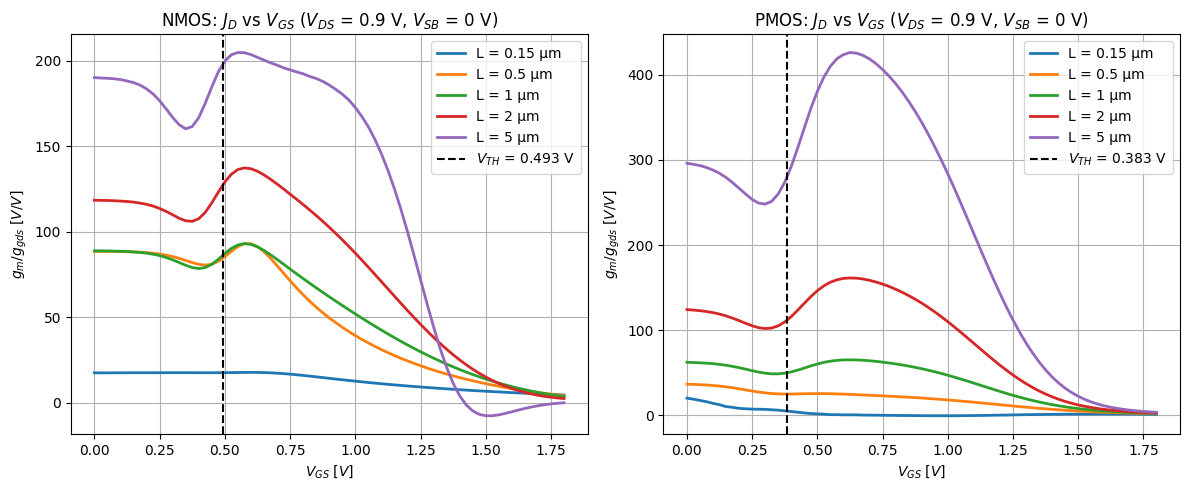

In [18]:
l = [0.15, 0.5, 1, 2, 5] # Change if needed
vgs = nmos['VGS']
vds = max(nmos['VDS']) / 2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# NMOS
vth_average = 0
index = 0
for length in l:
    x = nmos.lookup('GM_GDS', VGS=vgs, VDS=vds, VSB=0, L=length)
    y = nmos.lookup('VT', VGS=max(nmos['VGS'])/2, VDS=vds, VSB=0, L=length)
    vth_average += y
    index += 1
    ax1.plot(vgs, x, label=f'L = {length} μm', linewidth=2)
vth_average = vth_average / index

ax1.axvline(x=vth_average, color='black', linestyle='--', linewidth=1.5, label=f'$V_{{TH}}$ = {vth_average:.3f} V')
ax1.set_xlabel('$V_{GS}$ $[V]$')
ax1.set_ylabel('$g_m/g_{gds}$ $[V/V]$')
ax1.set_title(f'NMOS: $J_D$ vs $V_{{GS}}$ ($V_{{DS}}$ = {vds} V, $V_{{SB}}$ = 0 V)')
ax1.grid(True)
ax1.legend()

# PMOS
vth_average = 0
index = 0
for length in l:
    x = pmos.lookup('GM_GDS', VGS=vgs, VDS=vds, VSB=0, L=length)
    y = pmos.lookup('VT', VGS=max(nmos['VGS'])/2, VDS=vds, VSB=0, L=length)
    vth_average += y
    index += 1
    ax2.plot(vgs, x, label=f'L = {length} μm', linewidth=2)
vth_average = vth_average / index

ax2.axvline(x=vth_average, color='black', linestyle='--', linewidth=1.5, label=f'$V_{{TH}}$ = {vth_average:.3f} V')
ax2.set_xlabel('$V_{GS}$ $[V]$')
ax2.set_ylabel('$g_m/g_{gds}$ $[V/V]$')
ax2.set_title(f'PMOS: $J_D$ vs $V_{{GS}}$ ($V_{{DS}}$ = {vds} V, $V_{{SB}}$ = 0 V)')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

## fT vs VGS

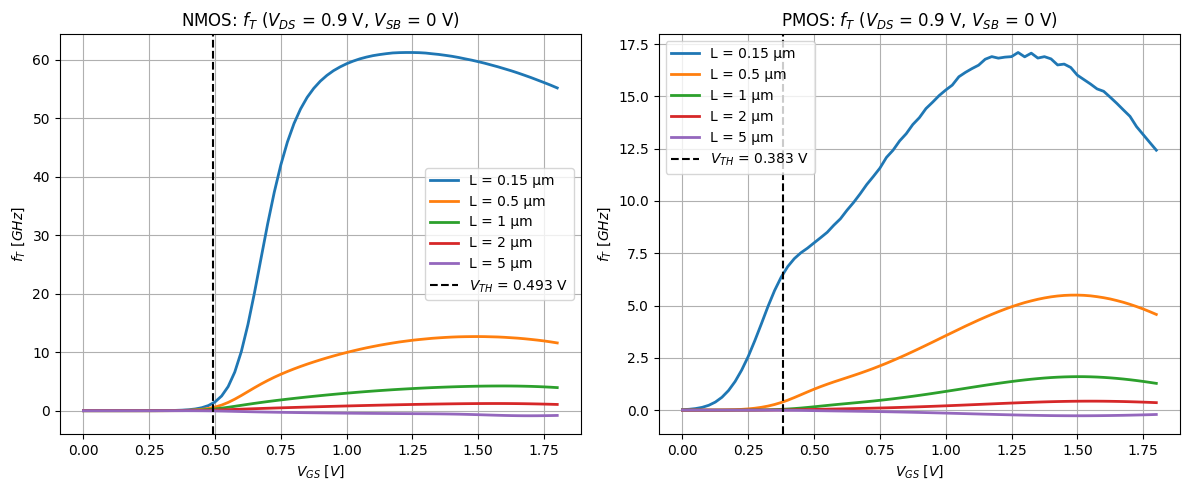

In [19]:
l = [0.15, 0.5, 1, 2, 5] # Change if needed
vgs = nmos['VGS']
vds = max(nmos['VDS']) / 2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# NMOS
vth_average = 0
index = 0
for length in l:
    x = nmos.lookup('GM_CGG', VGS=vgs, VDS=vds, VSB=0, L=length) / (2 * np.pi)
    y = nmos.lookup('VT', VGS=max(nmos['VGS'])/2, VDS=vds, VSB=0, L=length)
    vth_average += y
    index += 1
    ax1.plot(vgs, x/1e9, label=f'L = {length} μm', linewidth=2)
vth_average = vth_average / index

ax1.axvline(x=vth_average, color='black', linestyle='--', linewidth=1.5, label=f'$V_{{TH}}$ = {vth_average:.3f} V')
ax1.set_xlabel('$V_{GS}$ $[V]$')
ax1.set_ylabel('$f_T$ $[GHz]$')
ax1.set_title(f'NMOS: $f_T$ ($V_{{DS}}$ = {vds} V, $V_{{SB}}$ = 0 V)')
ax1.grid(True)
ax1.legend()

# PMOS
vth_average = 0
index = 0
for length in l:
    x = pmos.lookup('GM_CGG', VGS=vgs, VDS=vds, VSB=0, L=length) / (2 * np.pi)
    y = pmos.lookup('VT', VGS=max(nmos['VGS'])/2, VDS=vds, VSB=0, L=length)
    vth_average += y
    index += 1
    ax2.plot(vgs, x/1e9, label=f'L = {length} μm', linewidth=2)
vth_average = vth_average / index

ax2.axvline(x=vth_average, color='black', linestyle='--', linewidth=1.5, label=f'$V_{{TH}}$ = {vth_average:.3f} V')
ax2.set_xlabel('$V_{GS}$ $[V]$')
ax2.set_ylabel('$f_T$ $[GHz]$')
ax2.set_title(f'PMOS: $f_T$ ($V_{{DS}}$ = {vds} V, $V_{{SB}}$ = 0 V)')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

# VDS plots

## gm/ID vs VDS

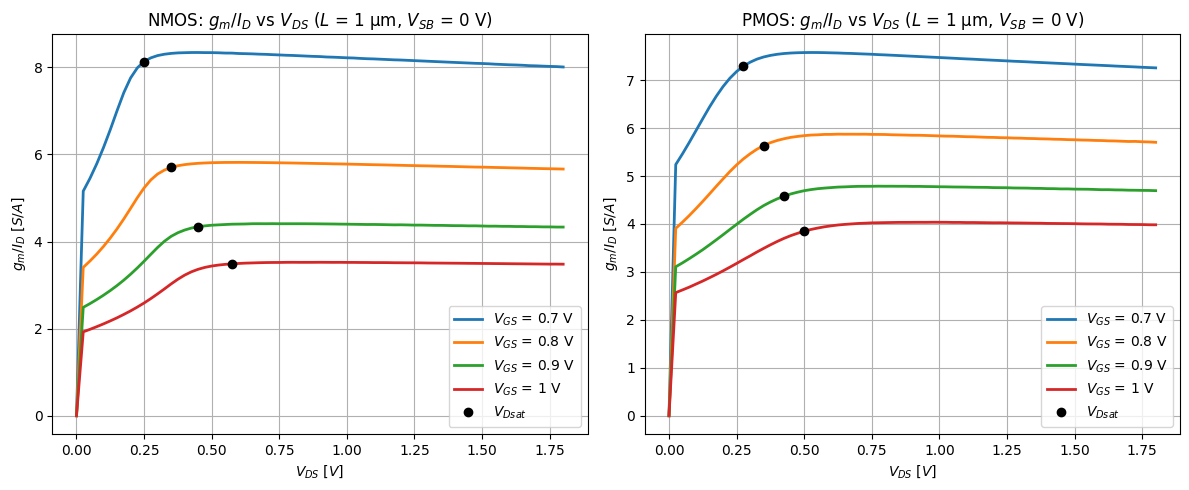

In [20]:
l = 1 # Change if needed
vgs = [0.7, 0.8, 0.9, 1] # Change if needed
vds = nmos['VDS']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# NMOS
for Vgs in vgs:
    x = nmos.lookup('GM_ID', VGS=Vgs, VDS=vds, VSB=0, L=l)
    vdsat = 2 / np.nanmax(x)
    ax1.plot(vds, x, label=f'$V_{{GS}}$ = {Vgs} V', linewidth=2)
    vdsat_idx = min(range(len(vds)), key=lambda i: abs(vds[i] - vdsat))
    vdsat_actual = vds[vdsat_idx]
    gmid_at_vdsat = x[vdsat_idx]
    ax1.plot(vdsat_actual, gmid_at_vdsat, 'ko', markersize=6)

ax1.plot([], [], 'ko', markersize=6, label='$V_{Dsat}$')
ax1.set_xlabel('$V_{DS}$ $[V]$')
ax1.set_ylabel('$g_m/I_D$ $[S/A]$')
ax1.set_title(f'NMOS: $g_m/I_D$ vs $V_{{DS}}$ ($L$ = {l} μm, $V_{{SB}}$ = 0 V)')
ax1.grid(True)
ax1.legend()

# PMOS
for Vgs in vgs:
    x = pmos.lookup('GM_ID', VGS=Vgs, VDS=vds, VSB=0, L=l)
    vdsat = 2 / np.nanmax(x)
    ax2.plot(vds, x, label=f'$V_{{GS}}$ = {Vgs} V', linewidth=2)
    vdsat_idx = min(range(len(vds)), key=lambda i: abs(vds[i] - vdsat))
    vdsat_actual = vds[vdsat_idx]
    gmid_at_vdsat = x[vdsat_idx]
    ax2.plot(vdsat_actual, gmid_at_vdsat, 'ko', markersize=6)

ax2.plot([], [], 'ko', markersize=6, label='$V_{Dsat}$')
ax2.set_xlabel('$V_{DS}$ $[V]$')
ax2.set_ylabel('$g_m/I_D$ $[S/A]$')
ax2.set_title(f'PMOS: $g_m/I_D$ vs $V_{{DS}}$ ($L$ = {l} μm, $V_{{SB}}$ = 0 V)')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

## JD vs VDS

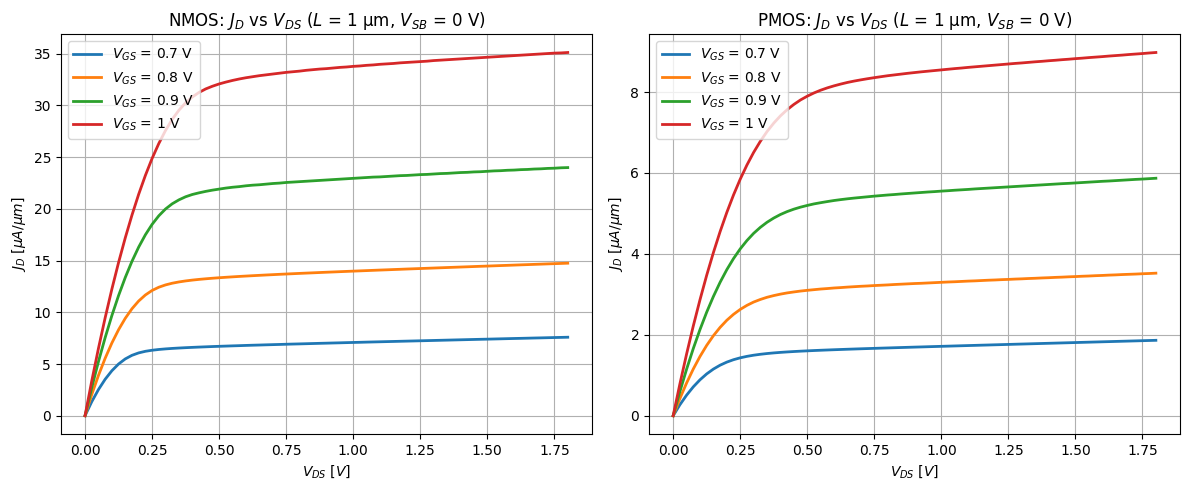

In [21]:
l = 1 # Change if needed
vgs = [0.7, 0.8, 0.9, 1] # Change if needed
vds = nmos['VDS']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# NMOS
for Vgs in vgs:
    x = nmos.lookup('ID_W', VGS=Vgs, VDS=vds, VSB=0, L=l)
    ax1.plot(vds, x/1e-6, label=f'$V_{{GS}}$ = {Vgs} V', linewidth=2)

ax1.set_xlabel('$V_{DS}$ $[V]$')
ax1.set_ylabel('$J_D$ $[μA/μm]$')
ax1.set_title(f'NMOS: $J_D$ vs $V_{{DS}}$ ($L$ = {l} μm, $V_{{SB}}$ = 0 V)')
ax1.grid(True)
ax1.legend()

# PMOS
for Vgs in vgs:
    x = pmos.lookup('ID_W', VGS=Vgs, VDS=vds, VSB=0, L=l)
    ax2.plot(vds, x/1e-6, label=f'$V_{{GS}}$ = {Vgs} V', linewidth=2)

ax2.set_xlabel('$V_{DS}$ $[V]$')
ax2.set_ylabel('$J_D$ $[μA/μm]$')
ax2.set_title(f'PMOS: $J_D$ vs $V_{{DS}}$ ($L$ = {l} μm, $V_{{SB}}$ = 0 V)')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

## gm/gds vs VDS

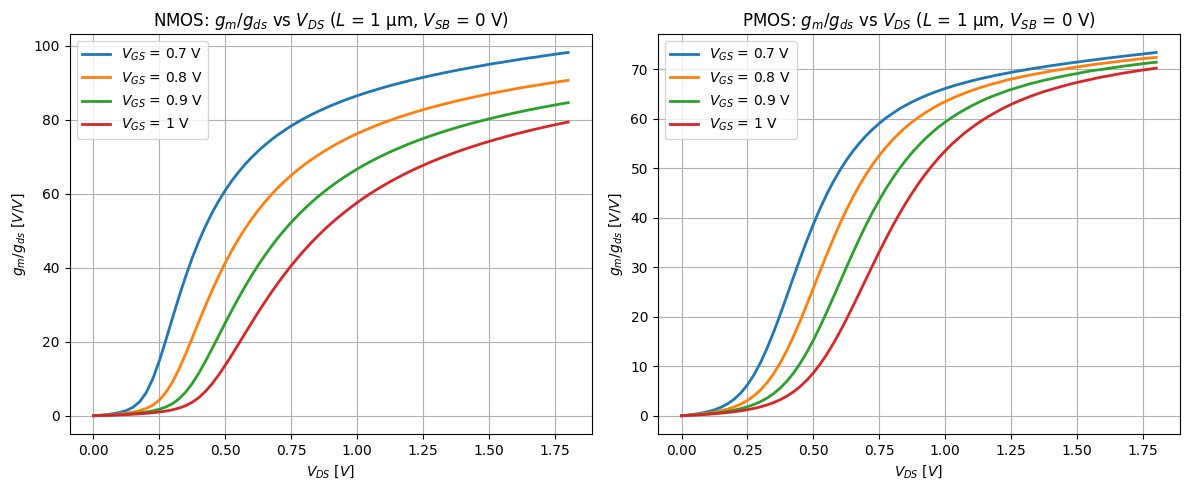

In [22]:
l = 1 # Change if needed
vgs = [0.7, 0.8, 0.9, 1] # Change if needed
vds = nmos['VDS']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# NMOS
for Vgs in vgs:
    x = nmos.lookup('GM_GDS', VGS=Vgs, VDS=vds, VSB=0, L=l)
    ax1.plot(vds, x, label=f'$V_{{GS}}$ = {Vgs} V', linewidth=2)

ax1.set_xlabel('$V_{DS}$ $[V]$')
ax1.set_ylabel('$g_m/g_{ds}$ $[V/V]$')
ax1.set_title(f'NMOS: $g_m/g_{{ds}}$ vs $V_{{DS}}$ ($L$ = {l} μm, $V_{{SB}}$ = 0 V)')
ax1.grid(True)
ax1.legend()

# PMOS
for Vgs in vgs:
    x = pmos.lookup('GM_GDS', VGS=Vgs, VDS=vds, VSB=0, L=l)
    ax2.plot(vds, x, label=f'$V_{{GS}}$ = {Vgs} V', linewidth=2)

ax2.set_xlabel('$V_{DS}$ $[V]$')
ax2.set_ylabel('$g_m/g_{ds}$ $[V/V]$')
ax2.set_title(f'PMOS: $g_m/g_{{ds}}$ vs $V_{{DS}}$ ($L$ = {l} μm, $V_{{SB}}$ = 0 V)')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

## fT vs VGS

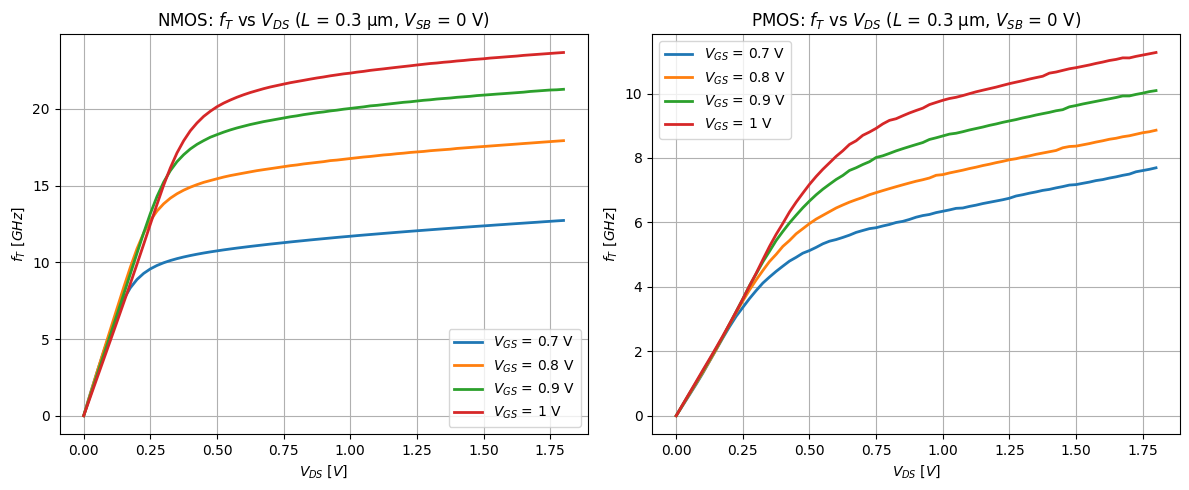

In [23]:
l = 0.3 # Change if needed
vgs = [0.7, 0.8, 0.9, 1] # Change if needed
vds = nmos['VDS']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# NMOS
for Vgs in vgs:
    x = nmos.lookup('GM_CGG', VGS=Vgs, VDS=vds, VSB=0, L=l) / (2 * np.pi)
    ax1.plot(vds, x/1e9, label=f'$V_{{GS}}$ = {Vgs} V', linewidth=2)

ax1.set_xlabel('$V_{DS}$ $[V]$')
ax1.set_ylabel('$f_T$ $[GHz]$')
ax1.set_title(f'NMOS: $f_T$ vs $V_{{DS}}$ ($L$ = {l} μm, $V_{{SB}}$ = 0 V)')
ax1.grid(True)
ax1.legend()

# PMOS
for Vgs in vgs:
    x = pmos.lookup('GM_CGG', VGS=Vgs, VDS=vds, VSB=0, L=l) / (2 * np.pi)
    ax2.plot(vds, x/1e9, label=f'$V_{{GS}}$ = {Vgs} V', linewidth=2)

ax2.set_xlabel('$V_{DS}$ $[V]$')
ax2.set_ylabel('$f_T$ $[GHz]$')
ax2.set_title(f'PMOS: $f_T$ vs $V_{{DS}}$ ($L$ = {l} μm, $V_{{SB}}$ = 0 V)')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

# gm/ID plots

## JD vs gm/ID

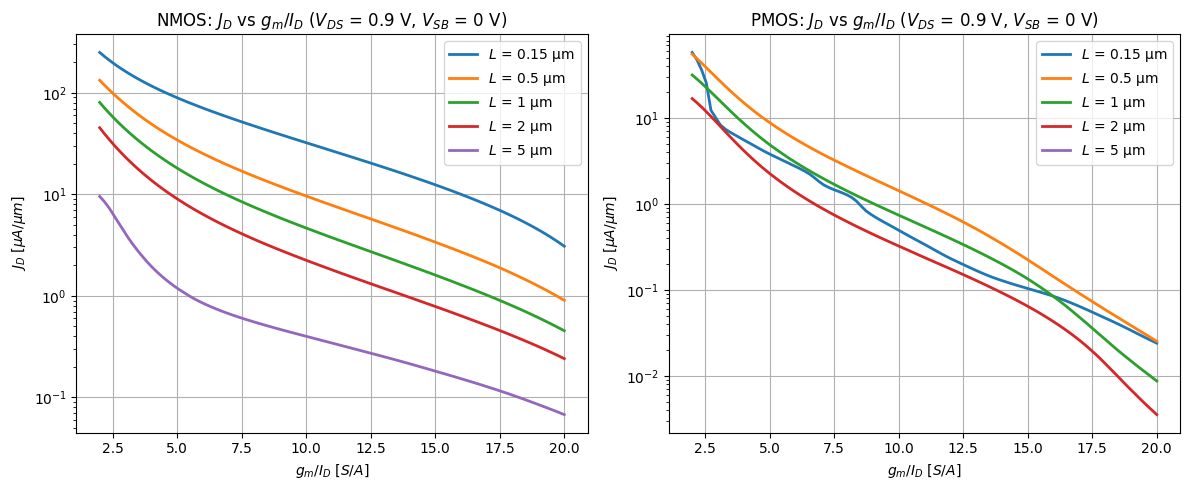

In [24]:
l = [0.15, 0.5, 1, 2, 5] # Change if needed
gm_id = np.linspace(2, 20, 100) # Change if needed
vds = max(nmos['VDS']) / 2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# NMOS
for Length in l:
    x = nmos.lookup('ID_W', GM_ID=gm_id, VDS=vds, VSB=0, L=Length)
    ax1.plot(gm_id, x/1e-6, label=f'$L$ = {Length} μm', linewidth=2)

ax1.set_xlabel('$g_m/I_D$ $[S/A]$')
ax1.set_ylabel('$J_D$ $[μA/μm]$')
ax1.set_yscale('log')
ax1.set_title(f'NMOS: $J_D$ vs $g_m/I_D$ ($V_{{DS}}$ = {vds} V, $V_{{SB}}$ = 0 V)')
ax1.grid(True)
ax1.legend()

# PMOS
for Length in l:
    x = pmos.lookup('ID_W', GM_ID=gm_id, VDS=vds, VSB=0, L=Length)
    ax2.plot(gm_id, x/1e-6, label=f'$L$ = {Length} μm', linewidth=2)

ax2.set_xlabel('$g_m/I_D$ $[S/A]$')
ax2.set_ylabel('$J_D$ $[μA/μm]$')
ax2.set_yscale('log')
ax2.set_title(f'PMOS: $J_D$ vs $g_m/I_D$ ($V_{{DS}}$ = {vds} V, $V_{{SB}}$ = 0 V)')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

## gm/gds vs gm/ID

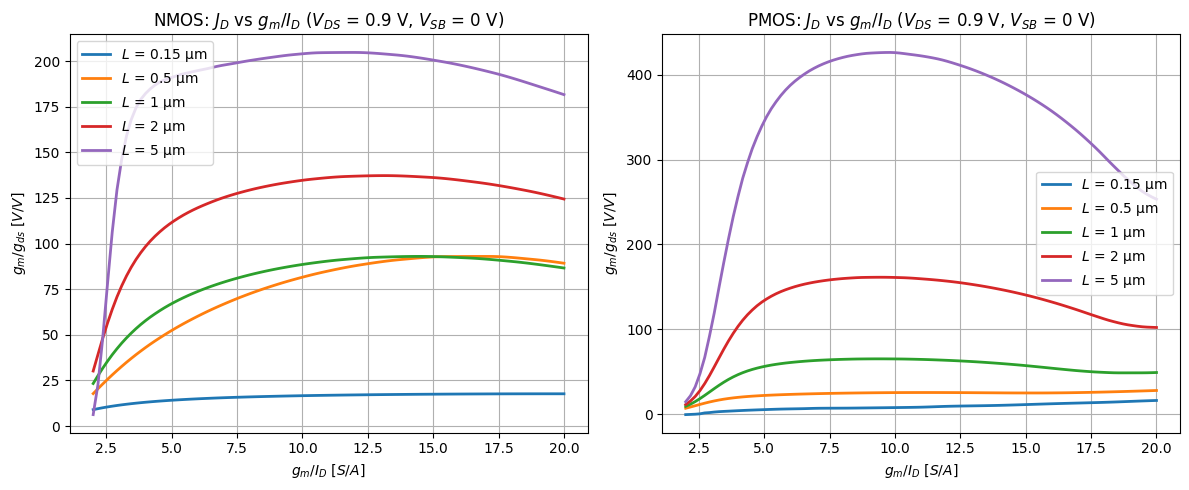

In [25]:
l = [0.15, 0.5, 1, 2, 5] # Change if needed
gm_id = np.linspace(2, 20, 100) # Change if needed
vds = max(nmos['VDS']) / 2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# NMOS
for Length in l:
    x = nmos.lookup('GM_GDS', GM_ID=gm_id, VDS=vds, VSB=0, L=Length)
    ax1.plot(gm_id, x, label=f'$L$ = {Length} μm', linewidth=2)

ax1.set_xlabel('$g_m/I_D$ $[S/A]$')
ax1.set_ylabel('$g_m/g_{ds}$ $[V/V]$')
ax1.set_title(f'NMOS: $J_D$ vs $g_m/I_D$ ($V_{{DS}}$ = {vds} V, $V_{{SB}}$ = 0 V)')
ax1.grid(True)
ax1.legend()

# PMOS
for Length in l:
    x = pmos.lookup('GM_GDS', GM_ID=gm_id, VDS=vds, VSB=0, L=Length)
    ax2.plot(gm_id, x, label=f'$L$ = {Length} μm', linewidth=2)

ax2.set_xlabel('$g_m/I_D$ $[S/A]$')
ax2.set_ylabel('$g_m/g_{ds}$ $[V/V]$')
ax2.set_title(f'PMOS: $J_D$ vs $g_m/I_D$ ($V_{{DS}}$ = {vds} V, $V_{{SB}}$ = 0 V)')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

## fT vs gm/ID

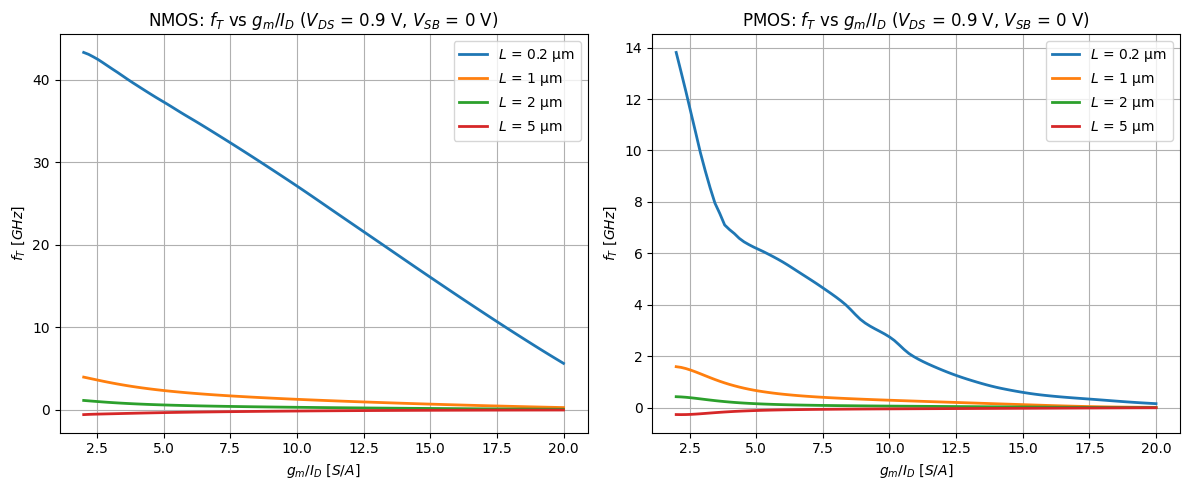

In [27]:
l = [0.2, 1, 2, 5] # Change if needed
gm_id = np.linspace(2, 20, 100) # Change if needed
vds = max(nmos['VDS']) / 2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# NMOS
for Length in l:
    x = nmos.lookup('GM_CGG', GM_ID=gm_id, VDS=vds, VSB=0, L=Length) / (2 * np.pi)
    ax1.plot(gm_id, x/1e9, label=f'$L$ = {Length} μm', linewidth=2)

ax1.set_xlabel('$g_m/I_D$ $[S/A]$')
ax1.set_ylabel('$f_T$ $[GHz]$')
ax1.set_title(f'NMOS: $f_T$ vs $g_m/I_D$ ($V_{{DS}}$ = {vds} V, $V_{{SB}}$ = 0 V)')
ax1.grid(True)
ax1.legend()

# PMOS
for Length in l:
    x = pmos.lookup('GM_CGG', GM_ID=gm_id, VDS=vds, VSB=0, L=Length) / (2 * np.pi)
    ax2.plot(gm_id, x/1e9, label=f'$L$ = {Length} μm', linewidth=2)

ax2.set_xlabel('$g_m/I_D$ $[S/A]$')
ax2.set_ylabel('$f_T$ $[GHz]$')
ax2.set_title(f'PMOS: $f_T$ vs $g_m/I_D$ ($V_{{DS}}$ = {vds} V, $V_{{SB}}$ = 0 V)')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()